In [1]:
# 导入库
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## 决策树

In [2]:
from sklearn.tree import DecisionTreeClassifier
# 导入鸢尾花数据集
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # 150个样本，4个属性
y = iris.target # 150个类标号
name = iris.target_names
print(X.shape)  # 150个样本，4个属性
print(y.shape)  # 150个类标号

(150, 4)
(150,)


0.9599358974358974


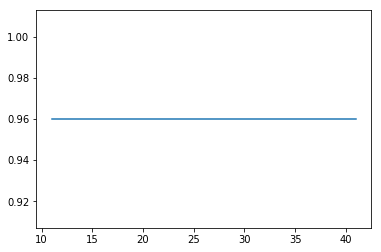

In [3]:
# max_depth 的学习曲线，确定大致范围，间隔是10
scores = []
for i in range(10,50,10):
    rf = DecisionTreeClassifier(max_depth=i+1, random_state=10)
    score = cross_val_score(rf, X, y, cv=4).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(11,51,10),scores)
plt.show()

#### 发现 max_depth 的值对模型没什么影响

0.9599358974358974


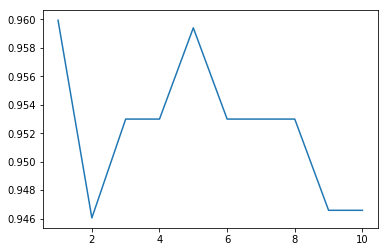

In [4]:
# min_samples_leaf 的学习曲线，确定大致范围，间隔是1
scores = []
for i in range(0,10,1):
    rf = DecisionTreeClassifier(min_samples_leaf=i+1, random_state=10)
    score = cross_val_score(rf, X, y, cv=4).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(1,11,1),scores)
plt.show()

#### 发现 min_samples_leaf 的值在 5 左右模型较好

0.9668803418803418


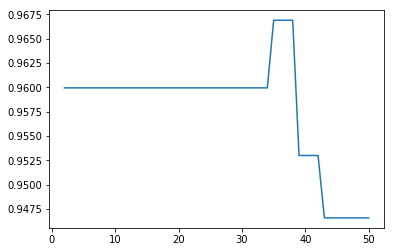

In [5]:
# min_samples_split 的学习曲线，确定大致范围，间隔是1
scores = []
for i in range(1,50,1):
    rf = DecisionTreeClassifier(min_samples_split=i+1, random_state=10)
    score = cross_val_score(rf, X, y, cv=4).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(2,51,1),scores)
plt.show()

#### 发现 min_samples_leaf 的值在 30-38 模型较好，下面进一步精确

0.9668803418803418


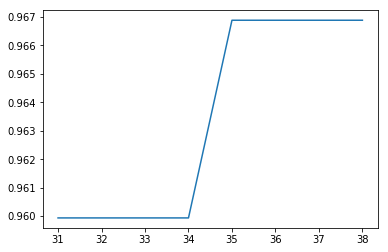

In [6]:
# min_samples_split 的学习曲线，确定大致范围，间隔是1
scores = []
for i in range(30,38,1):
    rf = DecisionTreeClassifier(min_samples_split=i+1, random_state=10)
    score = cross_val_score(rf, X, y, cv=4).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(31,39,1),scores)
plt.show()

#### 发现 min_samples_leaf 的值在 35 左右模型较好

In [7]:
# 将数据分割为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [8]:
# 输入模型的超参由验证集来选择
# 决策树主要的超参有：
# 1、指定切分质量的评价准则
criterion = ['gini', 'entropy']
# 2、树的最大深度
max_depth = [30,50]
# 3、分裂一个内部节点(非叶子节点)需要的最小样本数
min_samples_leaf = [4,5,6]
# 4、如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。
min_samples_split = [34,35,36]

In [9]:
# 适用于分类模型的评分标准
scores = ['precision', 'recall', 'accuracy', 'f1']

In [10]:
# 用GridSearchCV寻找最优参数（字典）
param = {'criterion':criterion,'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6)
grid.fit(X_train, y_train)
print('最佳度量值:',grid.best_score_)  # 获取最佳度量值
print('最佳参数：',grid.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('最佳模型：',grid.best_estimator_)  # 获取最佳度量时的分类器模型

最佳度量值: 0.9523809523809523
最佳参数： {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 34}
最佳模型： DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=34,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [11]:
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
# 注意最后利用测试集展示的才是泛化误差
y_true, y_pred = y_test, grid.predict(X_test)

#显示每个花类的精确度，召回率，F1值等信息
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=name))
print()

Grid scores on development set:

0.952 (+/-0.079) for {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 34}
0.952 (+/-0.079) for {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 35}
0.952 (+/-0.079) for {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 36}
0.952 (+/-0.079) for {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 34}
0.952 (+/-0.079) for {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 35}
0.952 (+/-0.079) for {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 36}
0.952 (+/-0.079) for {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 6, 'min_samples_split': 34}
0.952 (+/-0.079) for {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 6, 'min_samples_split': 35}
0.952 (+/-0.079) for {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 6, 'min_samples_split':

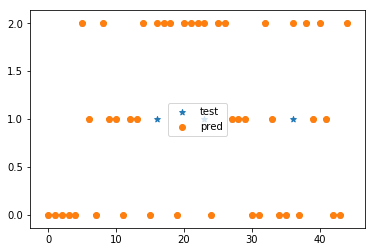

In [12]:
# 画图展示训练结果,分别为测试值和预测值
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(len(X_test))),y_test,marker='*')
ax.scatter(list(range(len(X_test))),y_pred,marker='o')  # 不管是画散点图还是折现图，都会被挡住
plt.legend(labels=['test', 'pred'])
plt.show()

#### 从图上可以看出，只有一个值分类错误，说明测试集分类得不错。

## 随机森林

In [13]:
from sklearn.ensemble import RandomForestClassifier
# 导入红酒数据集
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data  # 178个样本，13个属性
y = wine.target # 178个类标号
name = wine.target_names
print(X.shape)  # 178个样本，13个属性
print(y.shape)  # 178个类标号

(178, 13)
(178,)


0.9666666666666667


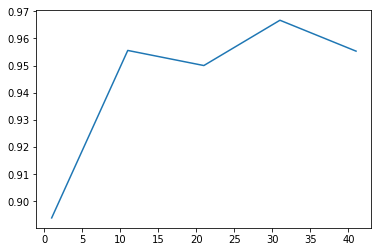

In [14]:
# n_estimators 的学习曲线，确定大致范围，间隔是10
scores = []
for i in range(0,50,10):
    rf = RandomForestClassifier(n_estimators=i+1, random_state=10)
    score = cross_val_score(rf, X, y, cv=4).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(1,51,10),scores)
plt.show()

#### 发现 n_estimators 的值在 10、30 左右模型较好

0.9722222222222222


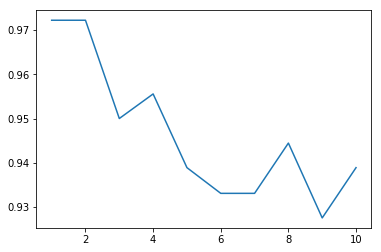

In [15]:
# min_samples_leaf 的学习曲线，确定大致范围，间隔是1
scores = []
for i in range(0,10,1):
    rf = RandomForestClassifier(min_samples_leaf=i+1, random_state=10)
    score = cross_val_score(rf, X, y, cv=4).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(1,11,1),scores)
plt.show()

#### 发现 min_samples_leaf 的值在 0-2 模型较好

In [16]:
# 将数据分割为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [17]:
# 输入模型的超参由验证集来选择
# 决策树主要的超参有：
# 1、指定切分质量的评价准则
criterion = ['gini', 'entropy']
# 2、决策树的个数，越多越好，但是性能就会越差
n_estimators = [10, 20, 30]
# 3、分裂一个内部节点(非叶子节点)需要的最小样本数
min_samples_leaf = [1,2]

In [18]:
# 适用于分类模型的评分标准
scores = ['precision', 'recall', 'roc_auc']

In [19]:
# 用GridSearchCV寻找最优参数（字典）
param = {'criterion':criterion,'n_estimators':n_estimators, 'min_samples_leaf':min_samples_leaf}
grid = GridSearchCV(RandomForestClassifier(), param_grid=param, cv=6)
grid.fit(X_train, y_train)
print('最佳度量值:',grid.best_score_)  # 获取最佳度量值
print('最佳参数：',grid.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('最佳模型：',grid.best_estimator_)  # 获取最佳度量时的分类器模型

最佳度量值: 0.9838709677419355
最佳参数： {'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 30}
最佳模型： RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [20]:
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
# 注意最后利用测试集展示的才是泛化误差
y_true, y_pred = y_test, grid.predict(X_test)

#显示每个类的精确度，召回率，F1值等信息
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=name))
print()

Grid scores on development set:

0.944 (+/-0.100) for {'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 10}
0.952 (+/-0.098) for {'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 20}
0.968 (+/-0.109) for {'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 30}
0.968 (+/-0.045) for {'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 10}
0.976 (+/-0.047) for {'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 20}
0.984 (+/-0.045) for {'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 30}
0.952 (+/-0.098) for {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 10}
0.976 (+/-0.047) for {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 20}
0.984 (+/-0.045) for {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 30}
0.919 (+/-0.077) for {'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 10}
0.952 (+/-0.098) for {'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 20}
0.976 

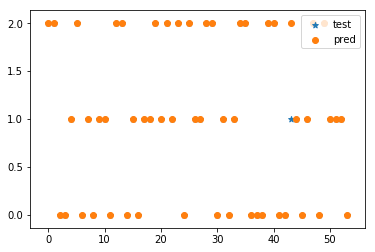

In [21]:
# 画图展示训练结果,分别为测试值和预测值
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(len(X_test))),y_test,marker='*')
ax.scatter(list(range(len(X_test))),y_pred,marker='o')  # 不管是画散点图还是折现图，都会被挡住
plt.legend(labels=['test', 'pred'])
plt.show()

#### 从图上可以看出，只有一个值分类错误，说明测试集分类得不错。

## 回归树

In [24]:
from sklearn.tree import DecisionTreeRegressor
# 导入鸢尾花数据集
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # 150个样本，4个属性
y = iris.target # 150个类标号
name = iris.target_names
print(X.shape)  # 150个样本，4个属性
print(y.shape)  # 150个类标号

(150, 4)
(150,)


0.6103988603988604


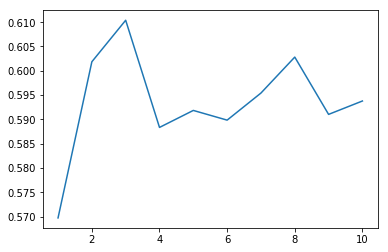

In [25]:
# min_samples_leaf 的学习曲线，确定大致范围，间隔是1
scores = []
for i in range(0,10,1):
    rf = DecisionTreeRegressor(min_samples_leaf=i+1, random_state=10)
    score = cross_val_score(rf, X, y, cv=4).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(1,11,1),scores)
plt.show()

#### 发现 min_samples_leaf 的值在 3 左右模型较好

0.5976961244754975


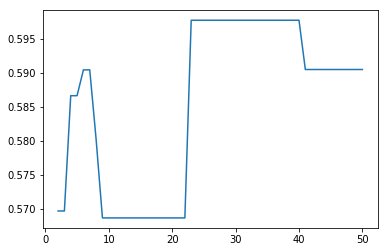

In [26]:
# min_samples_split 的学习曲线，确定大致范围，间隔是1
scores = []
for i in range(1,50,1):
    rf = DecisionTreeRegressor(min_samples_split=i+1, random_state=10)
    score = cross_val_score(rf, X, y, cv=4).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(2,51,1),scores)
plt.show()

#### 发现 min_samples_leaf 的值在 8、30 左右模型较好

In [27]:
# 将数据分割为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [28]:
# 输入模型的超参由验证集来选择
# 决策树主要的超参有：
# 1、指定切分质量的评价准则
criterion = ['mse']
# 2、分裂一个内部节点(非叶子节点)需要的最小样本数
min_samples_leaf = [2,3,4]
# 3、如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。
min_samples_split = [8,30]

In [29]:
# 适用于分类模型的评分标准
scores = ['precision', 'recall', 'accuracy', 'f1']

In [30]:
# 用GridSearchCV寻找最优参数（字典）
param = {'criterion':criterion, 'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid=param, cv=6)
grid.fit(X_train, y_train)
print('最佳度量值:',grid.best_score_)  # 获取最佳度量值
print('最佳参数：',grid.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('最佳模型：',grid.best_estimator_)  # 获取最佳度量时的分类器模型

最佳度量值: 0.8956555264940863
最佳参数： {'criterion': 'mse', 'min_samples_leaf': 4, 'min_samples_split': 30}
最佳模型： DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=30, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


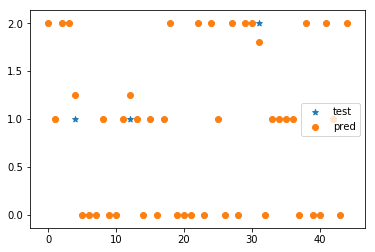

In [31]:
# 画图展示训练结果,分别为测试值和预测值
y_pred = grid.predict(X_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(len(X_test))),y_test,marker='*')
ax.scatter(list(range(len(X_test))),y_pred,marker='o')  # 不管是画散点图还是折现图，都会被挡住
plt.legend(labels=['test', 'pred'])
plt.show()

#### 从图上可以看出，只有三个值分类错误，说明测试集分类得不错。